# Challenge: Analyzing Text about Data Science

> *In this notebook, we experiment with using different URL - wikipedia article on Machine Learning. You can see that, unlike Data Science, this article contains a lot of terms, this making the analysis more problematic. We need to come up with another way to clean up the data after doing keyword extraction, to get rid of some frequent, but not meaningful word combinations.*

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

# Set a User-Agent header to respect Wikimedia's robot policy
# See: https://w.wiki/4wJS and https://phabricator.wikimedia.org/T400119
headers = {
    'User-Agent': 'Data-Science-For-Beginners-Tutorial/1.0 (https://github.com/microsoft/Data-Science-For-Beginners; educational-purpose) Python-requests'
}

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [3]:
import requests

text = requests.get(url, headers=headers).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-fe

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest build-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide (Top) 1 History 2 Relationships to other fields Toggle Relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data compression 2.3 Data mining 2.4 Generalization 2.5 Statistics 2.6 Statistical physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 4.6.4 Anomaly detection 4.6.5 Robot learning 4.6.6 Association rules 5 Models Toggle Models subsection 

## Step 3: Getting Insights

The most important step is to turn our data into some for from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake

  Using cached nlp_rake-0.0.2-py3-none-any.whl.metadata (11 kB)
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached pyrsistent-0.20.0-py3-none-any.whl.metadata (27 kB)
  Using cached regex-2025.11.3-cp313-cp313-win_amd64.whl.metadata (41 kB)
Using cached nlp_rake-0.0.2-py3-none-any.whl (30 kB)
Using cached pyrsistent-0.20.0-py3-none-any.whl (58 kB)
Using cached regex-2025.11.3-cp313-cp313-win_amd64.whl (277 kB)

   ---------------------------------------- 0/4 [regex]
   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [pyrsistent]
   ---------- ----------------------------- 1/4 [pyrsistent]
   -------------------- ------------------- 2/4 [langdetect]
   -------------------- ------------------- 2/4 [langdetect]
   -------------------- ------------------- 2/4 [langdetect]
   ------------------------------ --------- 3/4 [nlp_rake]
   ---------------------------------------- 4/4 [nlp_rake]



The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [7]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('dimensionality reduction', 4.0),
 ('data set', 4.0),
 ('polynomial time', 4.0),
 ('anomaly detection', 4.0),
 ('decision tree', 4.0),
 ('gaussian processes', 4.0),
 ('algorithmic bias', 4.0),
 ('language corpora', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 3.980392156862745),
 ('artificial neuron', 3.975),
 ('statistical learning', 3.96319018404908),
 ('deep learning', 3.96319018404908),
 ('feature learning', 3.96319018404908),
 ('reinforcement learning', 3.96319018404908),
 ('main article', 3.9545454545454546),
 ('machine learning', 3.943582340911825),
 ('artificial intelligence', 3.910483870967742),
 ('bayesian networks', 3.888888888888889),
 ('supervised learning', 3.8798568507157465),
 ('speech recognition', 3.857142857142857),
 ('neural networks', 3.857142857142857),
 ('pattern recognition', 3.857142857142857),
 ('statistical physics', 3.833333333333333),
 ('unsupervised learning', 3.809344030202926),
 ('international confere


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

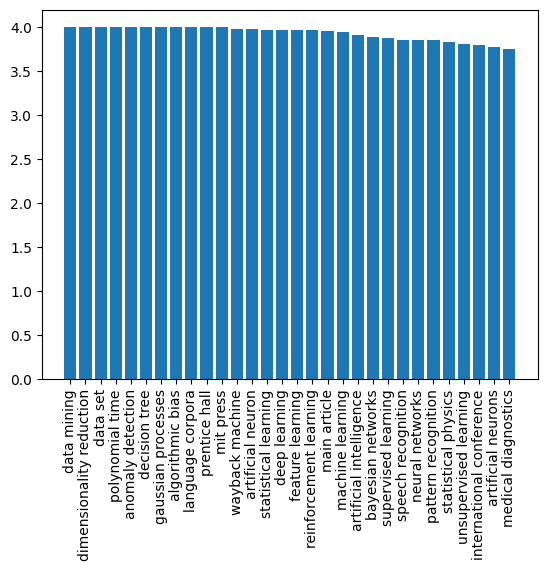

In [8]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [9]:
!{sys.executable} -m pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

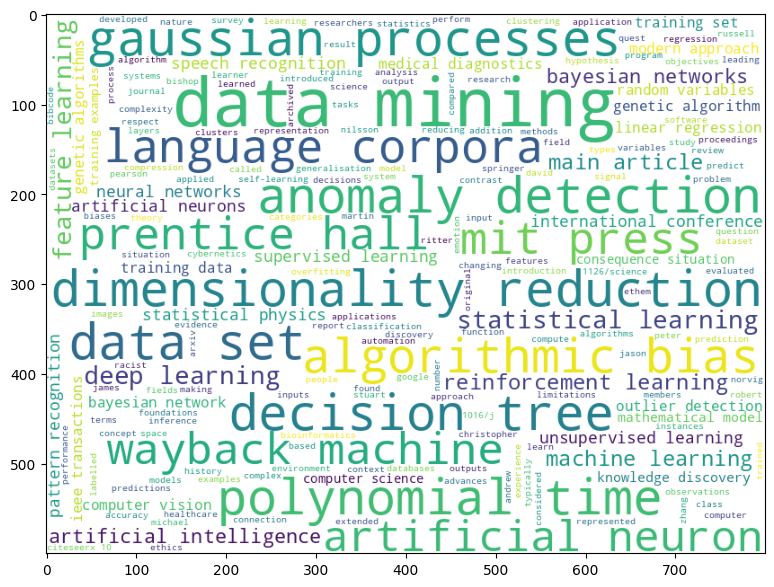

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

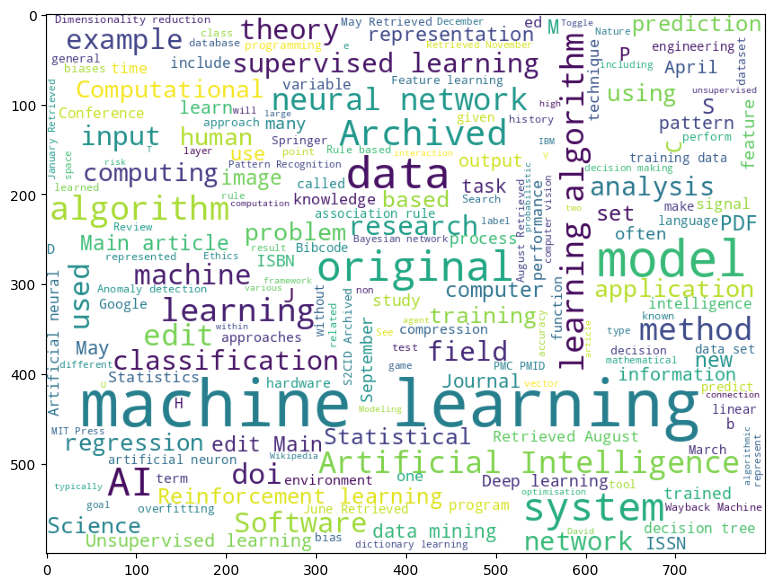

In [11]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [12]:
wc.generate(text).to_file('images/ds_wordcloud.png')

FileNotFoundError: [Errno 2] No such file or directory: 'images/ds_wordcloud.png'

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 